<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/09_Anomaly_detection/09_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UCZENIE NIENADZOROWANE /  UNSUPERVISED LEARNING

# Association rules - apriori algorithm

A basic library for machine learning in Python
To install the scikit-learn library, use the command below:
```
!pip install scikit-learn
```
To update to the latest version of the scikit-learn library, use the command below:
```
!pip install --upgrade scikit-learn
```

### Contents:
1. [Import libraries](#0)
2. [Data generation ](#1)
3. [Data visualisation](#2)
4. [K-mean algorithm](#3)
5. [Clasters visualisation](#4)
6. [PYCarpet analyse](#5)




### <a name='0'></a> Import libraries

In [ ]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import plotly.express as px
import plotly.graph_objects as go

sns.set(font_scale=1.2)
np.random.seed(10)
     

### <a name='1'></a> Data generation

In [ ]:
data = make_blobs(n_samples=300, cluster_std=2.0, random_state=10)[0]
data[:5]

array([[  4.64616033,   5.03253239],
       [  1.81963552,  -5.03357756],
       [  0.89059085,   3.41070216],
       [  0.61174827,   2.26068253],
       [  6.01229431, -10.52657552]])

### <a name='2'></a> Data preaparing

In [ ]:
tmp = pd.DataFrame(data=data, columns=['x1', 'x2'])
px.scatter(tmp, x='x1', y='x2', width=950, title='Local Outlier Factor', template='plotly_dark')

### <a name='3'></a> Data visualisation

In [ ]:
fig = go.Figure()
fig1 = px.density_heatmap(tmp, x='x1', y='x2', width=700, title='Outliers', nbinsx=20, nbinsy=20)
fig2 = px.scatter(tmp, x='x1', y='x2', width=700, title='Outliers', opacity=0.5)

fig.add_trace(fig1['data'][0])
fig.add_trace(fig2['data'][0])
fig.update_traces(marker=dict(size=4, line=dict(width=2, color='white')), selector=dict(mode='markers'))
fig.update_layout(template='plotly_dark', width=950)
fig.show()

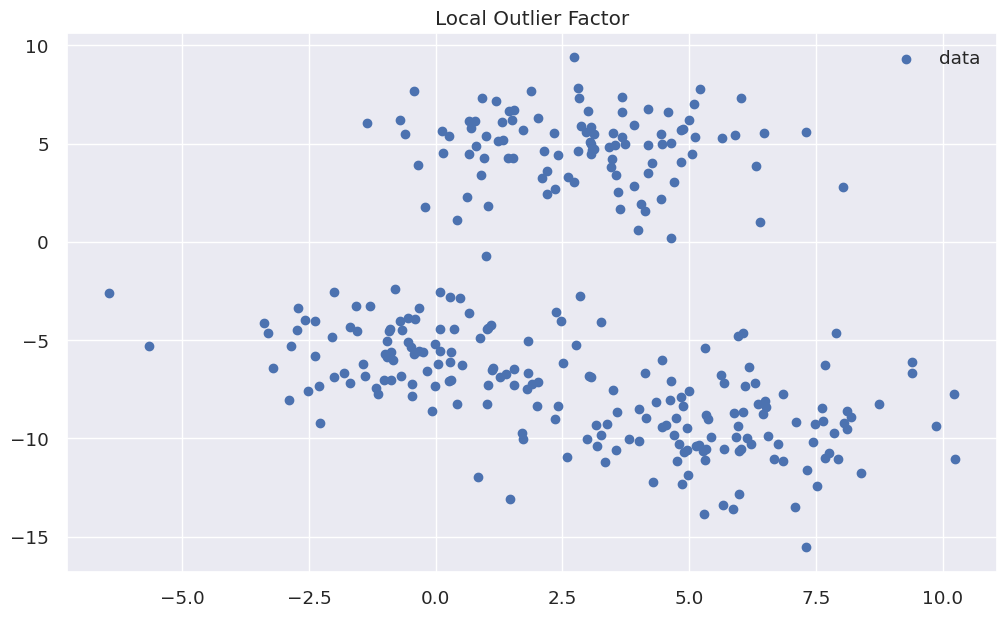

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(data[:, 0], data[:, 1], label='data', cmap='tab10')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()
     

In [ ]:
from sklearn.neighbors import LocalOutlierFactor 

lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(data)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:

all_data = np.c_[data, y_pred]
all_data[:5]

array([[  4.64616033,   5.03253239,   1.        ],
       [  1.81963552,  -5.03357756,   1.        ],
       [  0.89059085,   3.41070216,   1.        ],
       [  0.61174827,   2.26068253,   1.        ],
       [  6.01229431, -10.52657552,   1.        ]])

In [ ]:

tmp['y_pred'] = y_pred
px.scatter(tmp, x='x1', y='x2', color='y_pred', width=950, 
           title='Local Outlier Factor', template='plotly_dark')

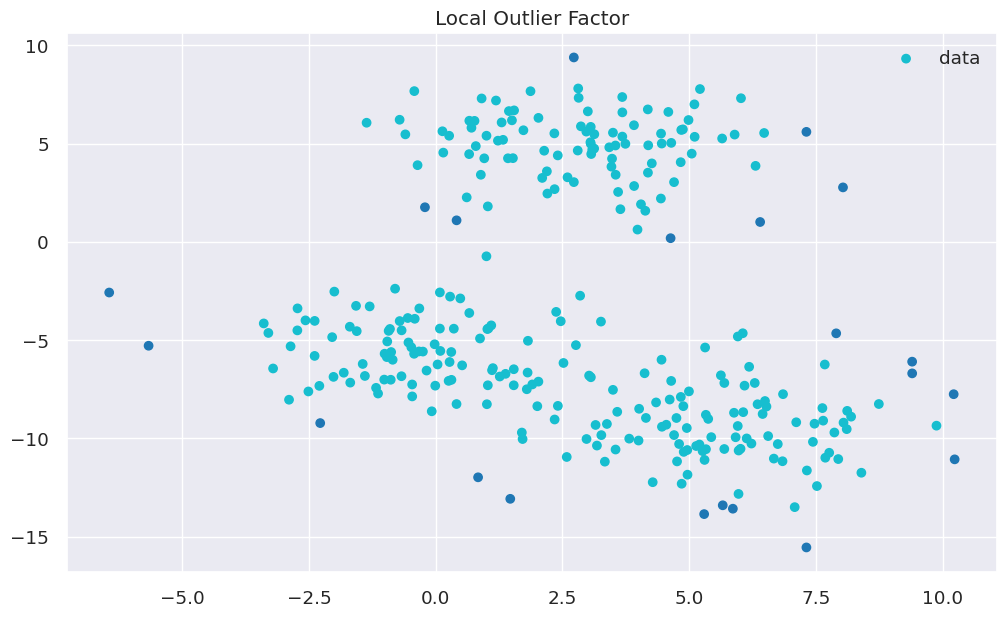

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [ ]:
LOF_scores = lof.negative_outlier_factor_
radius = (LOF_scores.max() - LOF_scores) / (LOF_scores.max() - LOF_scores.min())
radius[:5]

array([0.03834082, 0.12830657, 0.1180624 , 0.24543848, 0.01556816])

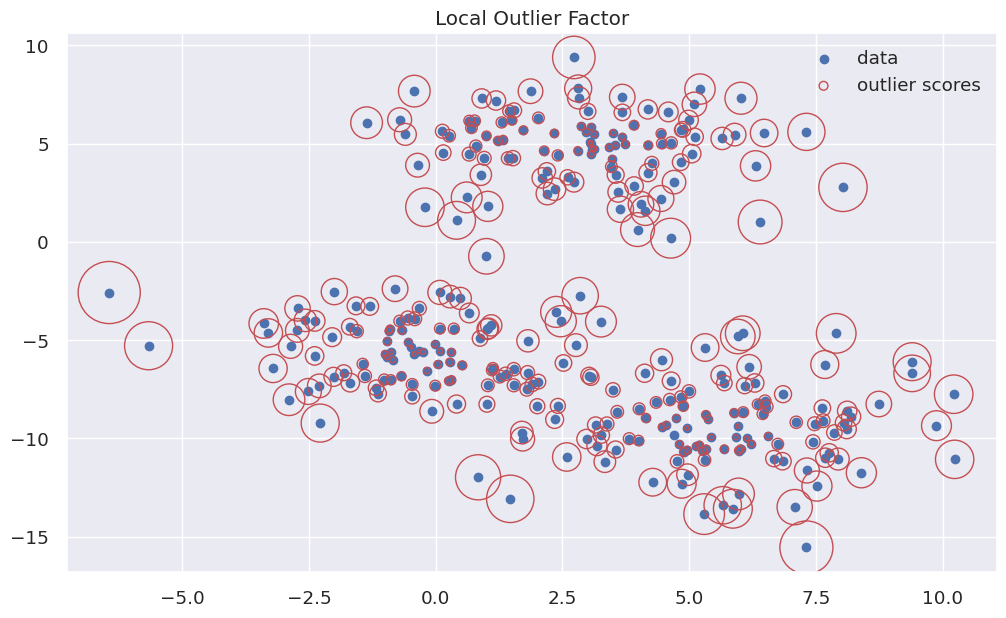

In [ ]:

plt.figure(figsize=(12, 7))
plt.scatter(all_data[:, 0], all_data[:, 1], label='data', cmap='tab10')
plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
plt.title('Local Outlier Factor')
legend = plt.legend()
legend.legendHandles[1]._sizes = [40]
plt.show()

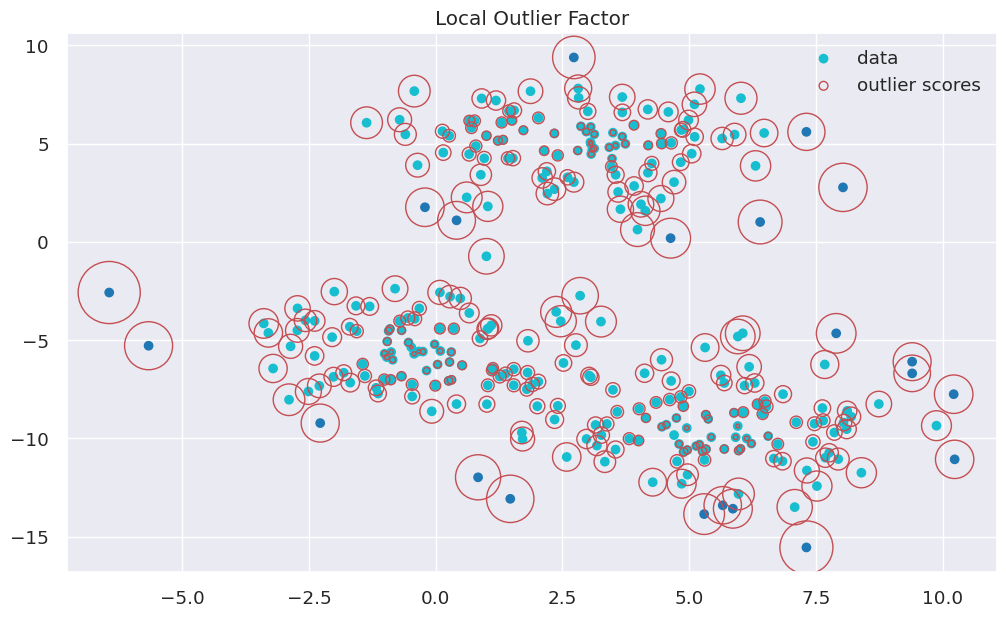

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
plt.title('Local Outlier Factor')
legend = plt.legend()
legend.legendHandles[1]._sizes = [40]
plt.show()
     

### <a name='5'></a> Pycarpet analyse

In [ ]:
!pip install pycaret[full]
!pip install umap-learn[plot]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: xlabel='x1', ylabel='x2'>

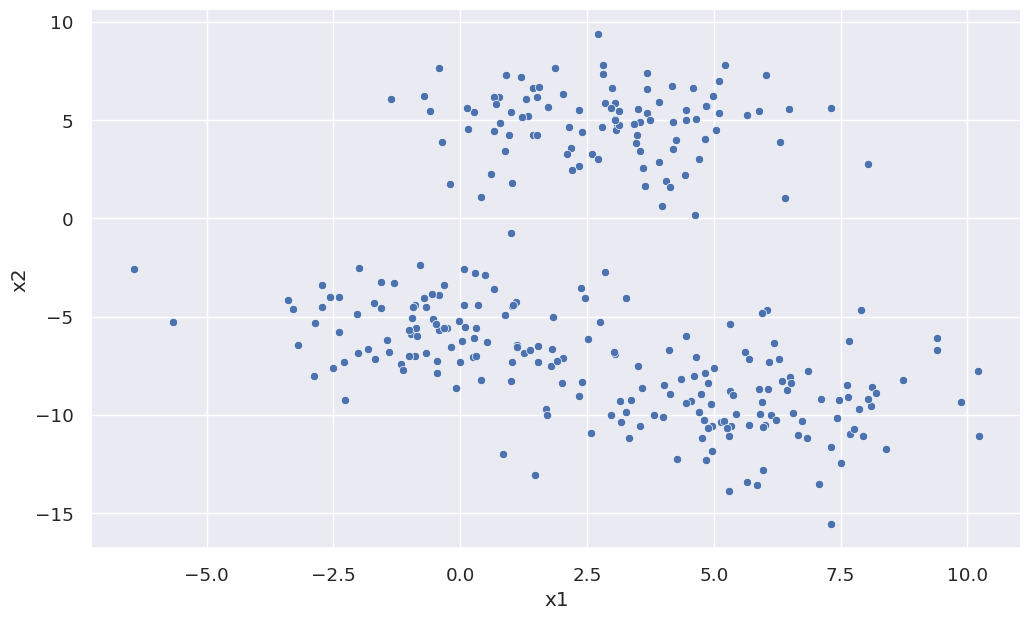

In [ ]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.scatterplot(x='x1',
              y='x2',
              data=tmp)

In [ ]:
#set up environment
from pycaret.anomaly import *

#set up experiment
exp_1 = setup(data, session_id=121, experiment_name='Anomaly1')

,Description,Value
0,Session id,121
1,Original data shape,"(285, 3)"
2,Transformed data shape,"(285, 3)"
3,Numeric features,3
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
#train test split
data =tmp.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = tmp.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (285, 3)
Unseen Data For Predictions: (15, 3)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      285 non-null    float64
 1   x2      285 non-null    float64
 2   y_pred  285 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.8 KB


In [ ]:
#local outlier factor
lof = create_model('lof')
#knn
knn = create_model('knn')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
#lof
lof_results = assign_model(lof)
lof_results.head()



,x1,x2,y_pred,Anomaly,Anomaly_Score
0,-2.294255,-7.325959,1,0,1.155652
1,5.972511,-12.822103,1,0,1.410429
2,-2.386536,-4.021692,1,0,1.123193
3,5.302589,-11.092747,1,0,1.027776
4,4.012270,-8.491632,1,0,1.005764


In [ ]:
#knn
knn_results = assign_model(knn)
knn_results.head()

,x1,x2,y_pred,Anomaly,Anomaly_Score
0,-2.294255,-7.325959,1,0,0.924437
1,5.972511,-12.822103,1,0,1.794289
2,-2.386536,-4.021692,1,0,0.896263
3,5.302589,-11.092747,1,0,0.608535
4,4.012270,-8.491632,1,0,0.872608


In [ ]:
knn_results[knn_results['Anomaly']==1] # which are outlieres

,x1,x2,y_pred,Anomaly,Anomaly_Score
46,6.398868,1.008805,-1,1,3.162037
47,9.397184,-6.690630,-1,1,3.201898
48,7.898824,-4.654311,-1,1,2.791143
91,-2.277368,-9.218783,-1,1,2.903063
97,7.311219,5.593413,-1,1,2.915095
98,-6.438663,-2.578645,-1,1,4.634207
110,-0.211633,1.758377,-1,1,2.932902
115,0.412014,1.093478,-1,1,3.009831
125,1.470956,-13.071706,-1,1,3.648010
174,2.724580,9.378011,-1,1,3.340145


In [ ]:
lof_results[lof_results['Anomaly']==1] # which are outlieres

,x1,x2,y_pred,Anomaly,Anomaly_Score
33,5.294717,-13.848385,-1,1,1.885987
46,6.398868,1.008805,-1,1,1.865151
47,9.397184,-6.690630,-1,1,1.821207
48,7.898824,-4.654311,-1,1,1.833145
91,-2.277368,-9.218783,-1,1,1.927501
97,7.311219,5.593413,-1,1,1.879538
98,-6.438663,-2.578645,-1,1,2.894737
125,1.470956,-13.071706,-1,1,2.059085
133,5.661364,-13.399875,-1,1,1.796568
174,2.724580,9.378011,-1,1,1.976030


In [ ]:
lof_anomaly = lof_results[lof_results['Anomaly']==1]
print(lof_anomaly.shape)

(15, 5)


In [ ]:
#filter anomalies

knn_anomaly = knn_results[knn_results['Anomaly']==1]
print(knn_anomaly.shape)

(15, 5)


In [ ]:
#lof
plot_model(lof, plot='umap')

ModuleNotFoundError: ignored

In [ ]:
#knn
plot_model(knn)


In [ ]:
# Prediction on Unseen Data
#local outlier factor
lof_unseen_predictions = predict_model(lof, data=data_unseen)
lof_unseen_predictions.head()

,x1,x2,y_pred,Anomaly,Anomaly_Score
0,1.377898,-6.714043,1.0,0,1.022185
1,10.215820,-7.750043,-1.0,1,1.873502
2,-1.007076,-5.690030,1.0,0,0.965441
3,4.346655,-8.168641,1.0,0,1.021089
4,5.860943,-13.573749,-1.0,0,1.770100


In [ ]:
#K-nearest Neighbors Detector
knn_unseen_predictions = predict_model(knn, data=data_unseen)
knn_unseen_predictions.head()

,x1,x2,y_pred,Anomaly,Anomaly_Score
0,1.377898,-6.714043,1.0,0,0.382756
1,10.215820,-7.750043,-1.0,1,3.065533
2,-1.007076,-5.690030,1.0,0,0.581618
3,4.346655,-8.168641,1.0,0,0.569840
4,5.860943,-13.573749,-1.0,0,2.343813


In [ ]:
#Save Models
save_model(lof, 'lof')
save_model(knn, 'knn')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['x1', 'x2', 'y_pred'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
   metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
   radius=1.0))]),
 'knn.pkl')